In [53]:
IRdisplay::display_html("
<style>
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 100%;
}
body.rise-enabled div.inner_cell>div.input_area {
    font-size: 150%;
}

body.rise-enabled div.output_subarea.output_text.output_result {
    font-size: 150%;
}
body.rise-enabled div.output_subarea.output_text.output_stream.output_stdout {
  font-size: 150%;
}
</style>
")

In [54]:
library(tidyverse)

<span style="float:left; border: 1px solid #aaa; margin: 2px;">

```
> print(df)
# A tibble: 100 x 3
     x1 x2        y
  <dbl> <fct> <dbl>
1 3.91  a      22.9
2 7.95  b      30.4
3 0.525 a     143. 
# ... with 97 more rows
```
</span>
<span style="float:left; border: 1px solid #aaa; margin: 2px;">

```
> summary(df)
       x1          x2           y           
 Min.   : 0.1942   a:50   Min.   :-227.376  
 1st Qu.: 2.5972   b:50   1st Qu.: -73.853  
 Median : 5.5929          Median :  11.907  
 Mean   : 6.4042          Mean   :   2.252  
 3rd Qu.: 8.8575          3rd Qu.:  74.171  
 Max.   :24.4541          Max.   : 303.760  
```
</span>

<span style="float:left; border: 1px solid #aaa; margin: 2px;">

```
Call:
lm(formula = y ~ x1 * x2, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-222.28  -63.68   12.43   76.39  253.39 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -49.958     23.273  -2.147   0.0343 *
x1             7.404      2.958   2.503   0.0140 *
x2b           22.155     36.319   0.610   0.5433  
x1:x2b        -1.836      4.521  -0.406   0.6855  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 107.3 on 96 degrees of freedom
Multiple R-squared:  0.08986,	Adjusted R-squared:  0.06142 
F-statistic: 3.159 on 3 and 96 DF,  p-value: 0.02818
```
</span>
<span style="float:left">
    
### Review questions
1. What is the $p$-value for $H_0: \beta_{x_1} = 0$?
2. What is the mean of $y$ given $x_1 = 3$ and $x_2 = a$?
3. What does $\operatorname{corr}(y,\hat{y})$ equal?
4. Approximately what is the mean of $y$ given $x_1 = 3$?
5. What is the $p$-value for $$H_0: \beta_{x_1} = \beta_{x_2 = b} = \beta_{x_1 \times (x_2 = b)} = 0?$$

</span>

# Lecture 23: Image analysis and classification

In the final lecture, we'll learn how to analyze images and treat them as data.

To read images we'll use the `magick` package. This is an interface to a powerful library called [ImageMagick](https://www.imagemagick.org/).

In [70]:
library(magick)

### How computers represent image data

Consider the following image:
![simpsons](https://tvmedia.ign.com/tv/image/article/730/730957/simpFamily_Vertical2f_72_1157585072.jpg)

Let's load this image in as data:

In [71]:
url <- 'https://tvmedia.ign.com/tv/image/article/730/730957/simpFamily_Vertical2f_72_1157585072.jpg'
img <- image_read(url)

`img` is now an image object that represents the image:

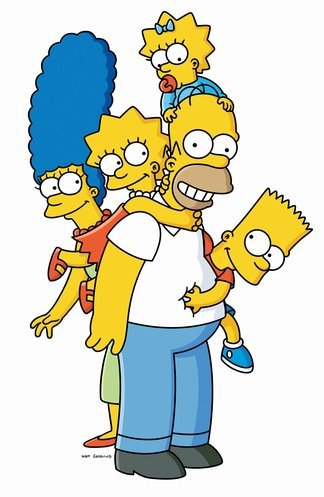

# A tibble: 1 x 7
  format width height colorspace matte filesize density  
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>    
1 JPEG     324    497 sRGB       FALSE    35636 +300x+300

In [58]:
img

We see that the image is in JPEG format, is 324 pixels wide, and 497 pixels high.

It turns out that color images can be represented using three "channels": red, green, and blue. The three elements of the array give the amount of those corresponding colors at each location in the image. For example, Homer's pants and Marge's hair are blue. If we look at just the blue channel, it should be very light in those portions of the image:

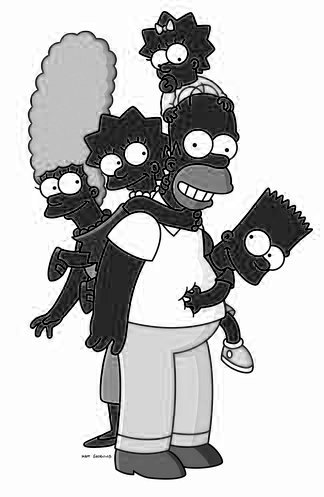

# A tibble: 1 x 7
  format width height colorspace matte filesize density  
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>    
1 JPEG     324    497 Gray       FALSE        0 +300x+300

In [59]:
image_channel(img, 'blue')

The skin is extra dark, because the skin is bright yellow, and yellow is a combination of green and red (but not blue). We can check this by looking next at the green channel:

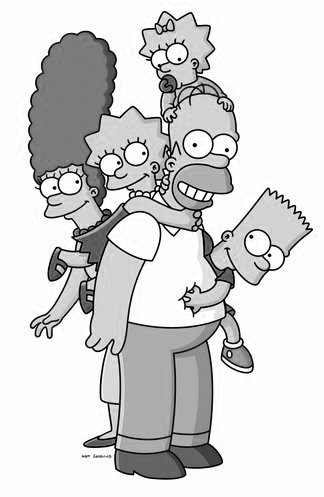

# A tibble: 1 x 7
  format width height colorspace matte filesize density  
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>    
1 JPEG     324    497 Gray       FALSE        0 +300x+300

In [60]:
image_channel(img, channel = "green")

As well as the red channel:

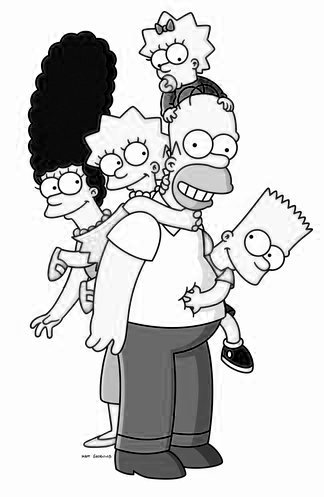

# A tibble: 1 x 7
  format width height colorspace matte filesize density  
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>    
1 JPEG     324    497 Gray       FALSE        0 +300x+300

In [61]:
image_channel(img, channel = "red")

The underlying data stored by this image can be accessed by using command `image_data()`:

In [72]:
img_data <- image_data(img)
str(img_data)

 'bitmap' raw [1:3, 1:324, 1:497] fd fd fd fd ...


What is `img_data`?

In [63]:
str(img_data)

 'bitmap' raw [1:3, 1:324, 1:497] fd fd fd fd ...


This is a `bitmap` with dimensions `[1:3, 1:324, 1:497]`. The second and third dimensions we recognize as the width and height of the image. The first are the three channels. To look at the actual numbers which encode this image, we can convert it to an integer

In [73]:
img_data %>% as.integer %>% dim   # note the channels now occur as the third axis
red <- img_data %>% as.integer %>% .[,,1]
red[150:170, 150:170]

[1] 497 324   3

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
 [1,] 239  225  255  249  249  249  248  249  253  253   ⋯     248   219  
 [2,] 252  250  239  247  248  247  248  251  254  251   ⋯     227   239  
 [3,] 238  235  242  244  247  247  249  253  254  248   ⋯     235   230  
 [4,] 231  242  240  245  247  248  251  253  250  240   ⋯     232   229  
 [5,] 223  237  248  245  247  247  250  251  248  237   ⋯     244   228  
 [6,] 235  239  240  244  247  247  249  250  245  235   ⋯     231   236  
 [7,] 228  244  248  246  248  248  250  249  247  238   ⋯     226   248  
 [8,] 246  235  236  246  248  251  250  251  250  243   ⋯     239   222  
 [9,] 254  244  250  247  250  250  250  251  253  249   ⋯     228   234  
[10,] 241  228  248  247  249  249  248  250  252  252   ⋯     255   221  
[11,] 227  255  247  248  249  248  246  248  251  252   ⋯     255   236  
[12,] 252  251  249  235  246  231  238  239  231  254   ⋯     248   251  
[13,] 255  237  250  203 

Each entry of the `red` matrix is a number between 0 and 255 ($2^8 = 256$ possible values). A zero indicates no red, and a 255 indicates max intensity. 

### Example: Eigenfaces

The directory `faces/` contains around 1000 headshots for men and women with neutral facial expressions:

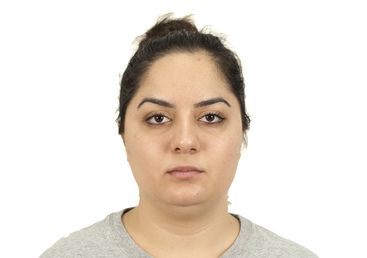

# A tibble: 1 x 7
  format width height colorspace matte filesize density  
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>    
1 JPEG     367    258 sRGB       FALSE    39841 +240x+240

In [101]:
face_images <- str_c("faces/", dir("faces/")) 
sample(face_images, 1) %>% image_read

### Exercise
Fill in the template to create a data frame of all of these faces:

In [105]:
faces_df <- tibble(
    filename = str_c('faces/', dir("faces/"))) %>% 
    mutate(face = map(filename, image_read))

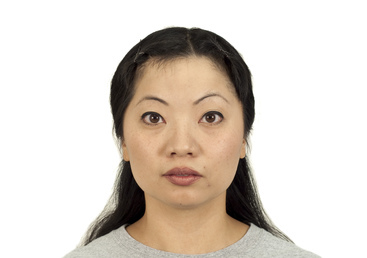

[[1]]
# A tibble: 1 x 7
  format width height colorspace matte filesize density  
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>    
1 JPEG     367    258 sRGB       FALSE    43280 +240x+240


In [107]:
faces_df$face[1]

Each row of `faces_df` contains an face:

In [67]:
faces_df[1,]$face

ERROR: Error in eval(expr, envir, enclos): object 'faces_df' not found


To work with the images it will be easier if they are in black and white:

In [108]:
faces_df$face_bw <- map(faces_df$face, image_convert, type="grayscale")

Finally, we will convert each face to a vector of data:

In [109]:
faces_df$face_data <- map(faces_df$face_bw, ~ as.integer(image_data(.)))

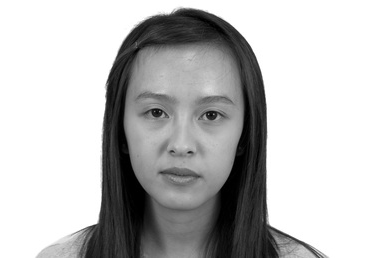

# A tibble: 1 x 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG      367    258 Gray       FALSE        0 +72x+72

In [110]:
visualize_face <- function(v) {
    v <- as.integer(v) %>% as.raw
    dim(v) <- c(1, 258, 367)
    image_read(v) %>% image_rotate(90)
}
visualize_face(faces_df$face_data[[20]])

Now we can do interesting things with faces. For example, we can average them:

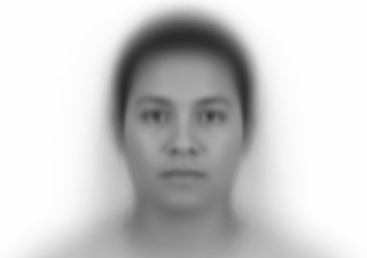

# A tibble: 1 x 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG      367    258 Gray       FALSE        0 +72x+72

In [112]:
M <- do.call(rbind, faces_df$face_data)
visualize_face(colMeans(M))

Or cluster them:

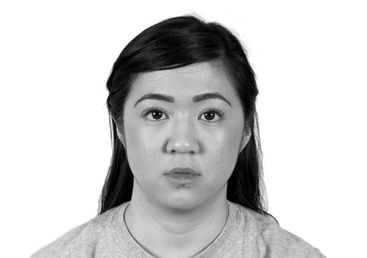

[[1]]
# A tibble: 1 x 7
  format width height colorspace matte filesize density  
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>    
1 JPEG     367    258 Gray       FALSE        0 +240x+240


[1] 2

In [133]:
# clust <- kmeans(M, 8)
#clust$cluster[1:10]
faces_df$face_bw[4]
clust$cluster[4]

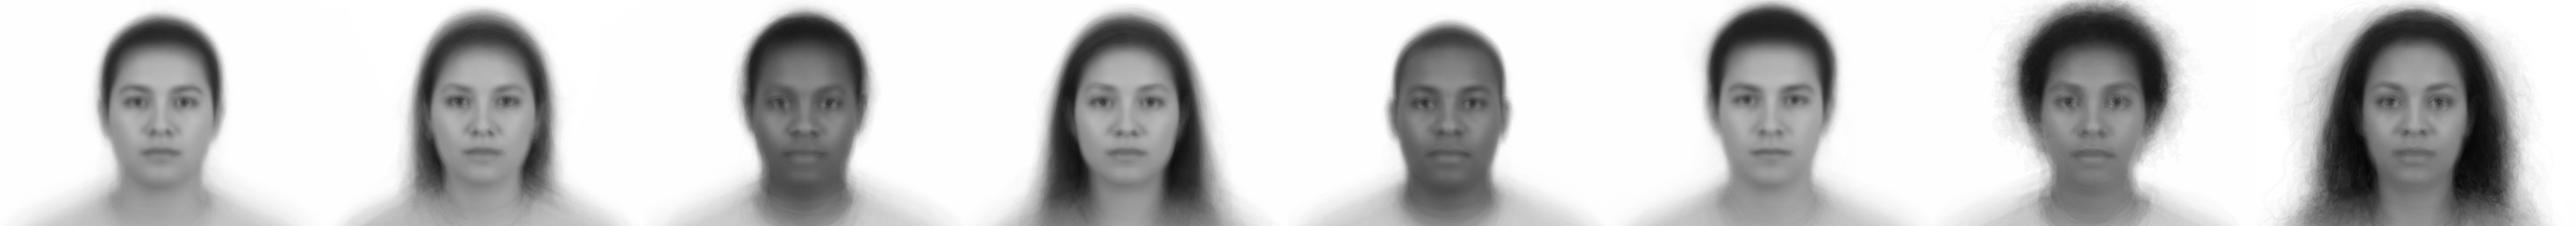

# A tibble: 1 x 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG     2936    258 Gray       FALSE        0 +72x+72

In [121]:
1:8 %>% map(~ visualize_face(clust$centers[.,])) %>% reduce(c) %>% 
    image_append

Now we are going to do something cool. We have already seen that the linear model can be used to write an outcome in terms of a number linear combination of a sum of explanatory variables:

$$y = a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots$$

Can we do something similar for faces?

``face = a_1 <face_1> + a_2 <face_2> + ...``

What should `face_1`, `face_2` be here?

In [351]:
pca <- prcomp(M, center = T, scale = T)

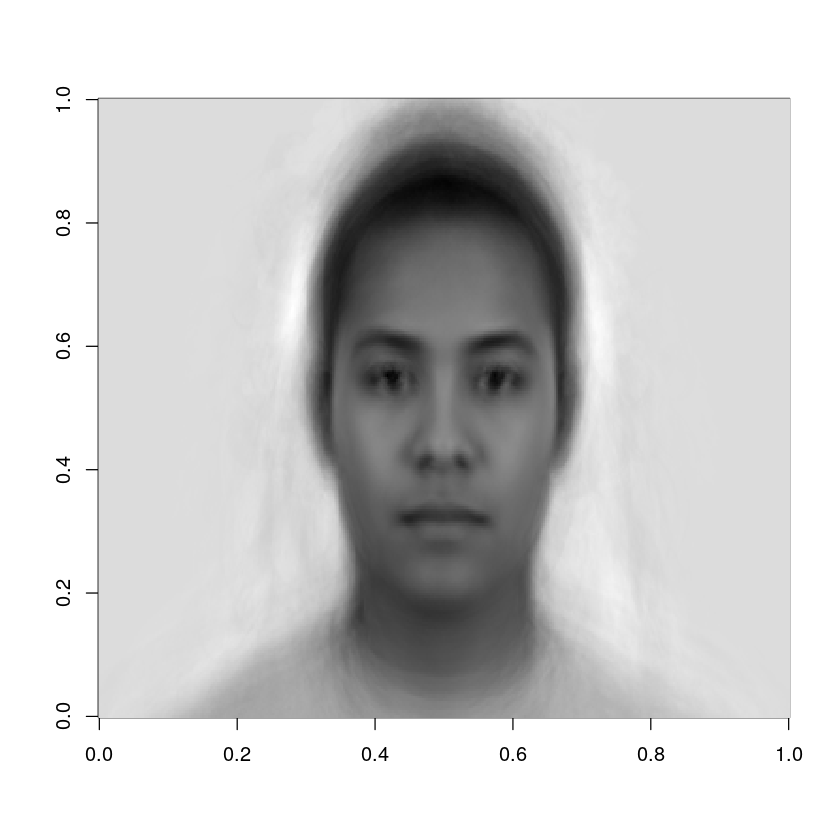

In [421]:
p <- pca$x[100,2:50] %*% t(pca$rotation[,2:50])
p <- scale(p, center = FALSE , scale=1/pca$scale)
p <- scale(p, center = -1 * pca$center, scale=FALSE)
p %>% rev %>%  matrix(nrow=258) %>% t %>% image(col = gray((0:256)/256))

### Example: Image classification
Next will use logistic regression to build an image classifier. We will train a model that recognizes the number 5.

In [134]:
load("mnist.RData")

The `mnist` table is a data frame with 60000 observations and 785 columns. Each row corresponds to a handwritten digit. The first column is the label of that image, and the next $784=28^2$ columns are pixel data for each image. 

In [137]:
mnist %>% slice(1) %>% print

# A tibble: 1 x 785
     X1    X2    X3    X4    X5    X6    X7    X8    X9   X10   X11   X12   X13
  <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
1     5     0     0     0     0     0     0     0     0     0     0     0     0
# ... with 772 more variables: X14 <dbl>, X15 <dbl>, X16 <dbl>, X17 <dbl>,
#   X18 <dbl>, X19 <dbl>, X20 <dbl>, X21 <dbl>, X22 <dbl>, X23 <dbl>,
#   X24 <dbl>, X25 <dbl>, X26 <dbl>, X27 <dbl>, X28 <dbl>, X29 <dbl>,
#   X30 <dbl>, X31 <dbl>, X32 <dbl>, X33 <dbl>, X34 <dbl>, X35 <dbl>,
#   X36 <dbl>, X37 <dbl>, X38 <dbl>, X39 <dbl>, X40 <dbl>, X41 <dbl>,
#   X42 <dbl>, X43 <dbl>, X44 <dbl>, X45 <dbl>, X46 <dbl>, X47 <dbl>,
#   X48 <dbl>, X49 <dbl>, X50 <dbl>, X51 <dbl>, X52 <dbl>, X53 <dbl>,
#   X54 <dbl>, X55 <dbl>, X56 <dbl>, X57 <dbl>, X58 <dbl>, X59 <dbl>,
#   X60 <dbl>, X61 <dbl>, X62 <dbl>, X63 <dbl>, X64 <dbl>, X65 <dbl>,
#   X66 <dbl>, X67 <dbl>, X68 <dbl>, X69 <dbl>, X70 <dbl>, X71 <dbl>,
#   X72 <dbl>, X73 <dbl>, X74 <dbl>

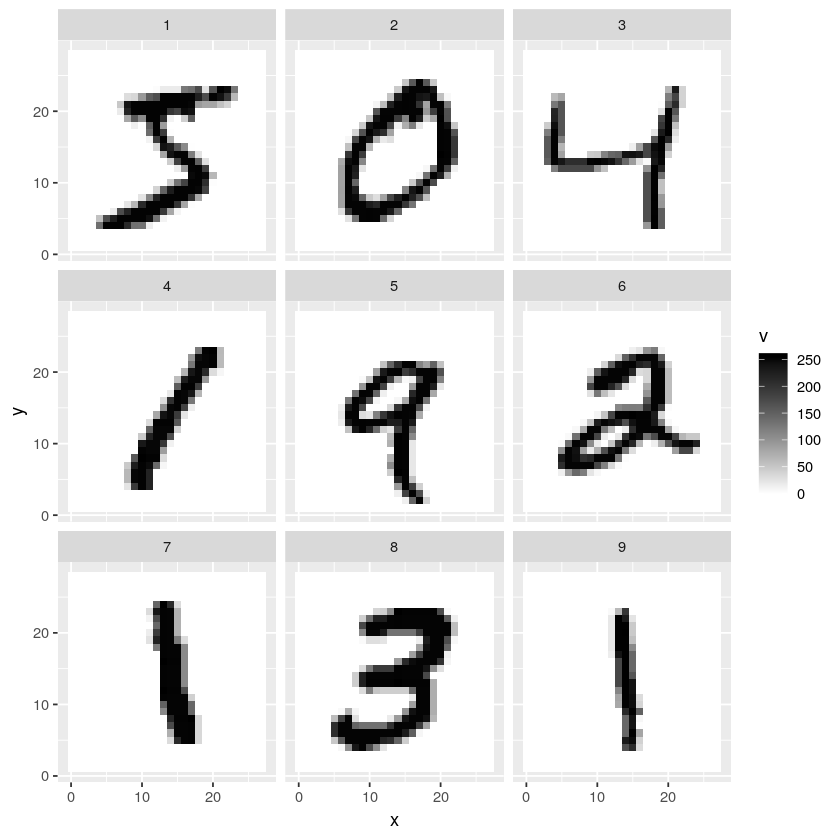

In [425]:
mnist %>% slice(1:9) %>% mutate(i=row_number()) %>% 
    gather("k", "v", X2:X785) %>% mutate(px = as.numeric(str_sub(k, 2)) - 2,
                                         x = px %% 28,
                                         y = 28 - (px %/% 28)) %>% 
    ggplot() + geom_tile(aes(x=x, y=y, fill=v)) + facet_wrap(~ i) + 
    scale_fill_gradient(low="white", high="black")

Use logistic regression to build an image classifier that tells whether or not the image is a "5".

In [426]:
train <- slice(mnist, 1:50000)
test <- slice(mnist, -(1:50000))

The `mnist` table is a data frame with 60000 observations and 785 columns. Each row corresponds to a handwritten digit. The first column is the label of that image, and the next $784=28^2$ columns are pixel data for each image. 

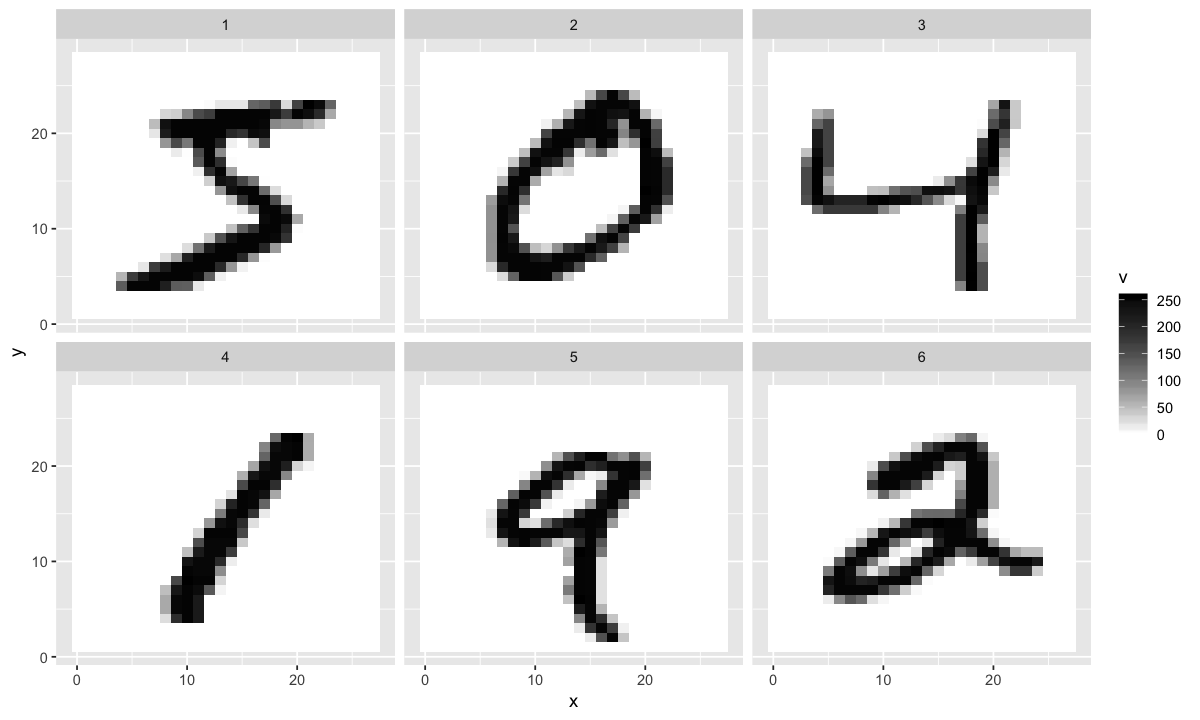

In [142]:
plot_images <- function(df) {
    df %>% mutate(i=row_number()) %>% 
    gather("k", "v", X2:X785) %>% mutate(px = as.numeric(str_sub(k, 2)) - 2,
                                         x = px %% 28,
                                         y = 28 - (px %/% 28)) %>% 
    ggplot() + geom_tile(aes(x=x, y=y, fill=v)) + facet_wrap(~ i) + 
    scale_fill_gradient(low="white", high="black")
}
mnist %>% slice(1:6) %>% plot_images

### Challenge problem
Use logistic regression to build an image classifier that tells whether or not the image is a "5".

In [139]:
train <- slice(mnist, 1:50000)
test <- slice(mnist, -(1:50000))

If we look back at the pictures, we see that a lot of the data columns a extraneous. For example:

In [ ]:
summary(select(train, X2:X10))

This is a good moment to talk about *dimensionality reduction*. Nowadays we often find ourselves in a situation where there is too much data to do analysis. It can be useful to try and reduce the size of the data. PCA again to the rescue!

In [143]:
pca <- prcomp(train[, 2:785], center=F, scale=F)

The idea of PCA is to find a more efficient way of representing our data. In particular, PCA will find new images that can be used to efficiently represent the original images. To better understand what this means,
let's look at some of those images:

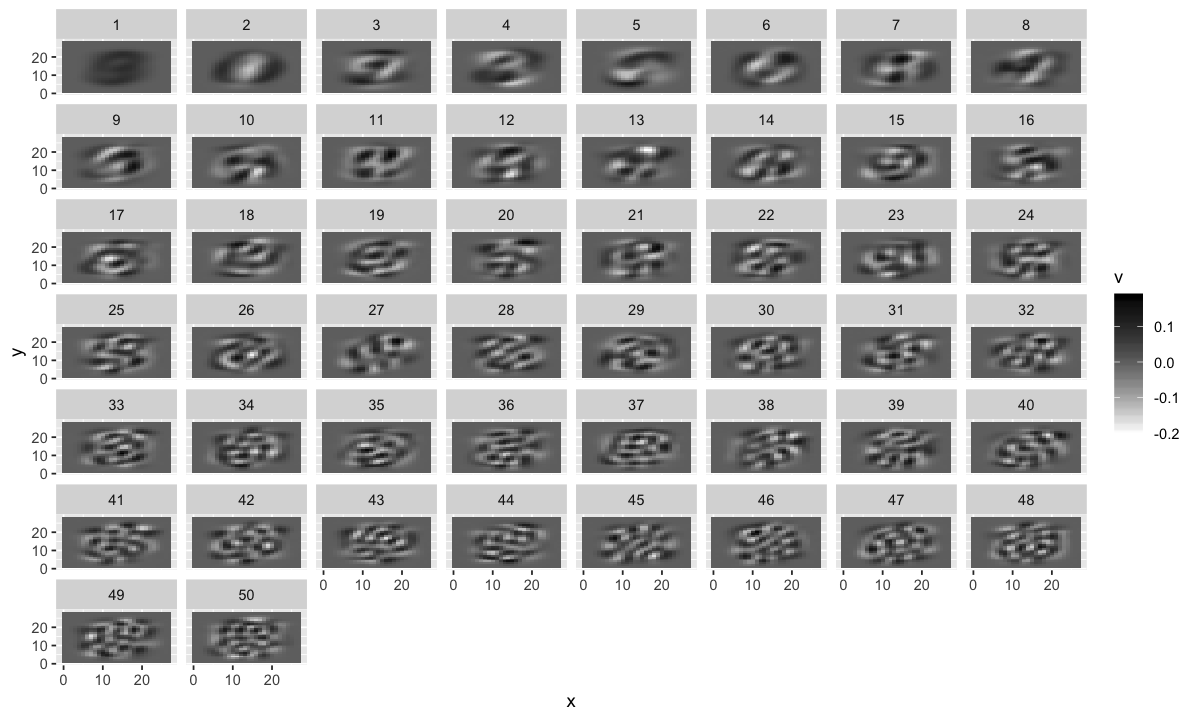

In [145]:
t(pca$rotation[,1:5 0]) %>% as_tibble %>% plot_images

These are the first nine principal components. We can write each of our (handwritten digits) as linear combination of these pictures -- literally adding them up.

In [ ]:
plot_images(train[1:9,])

By varying the number of principal components that we use to represent each image, we obtain progressively better results using less data:

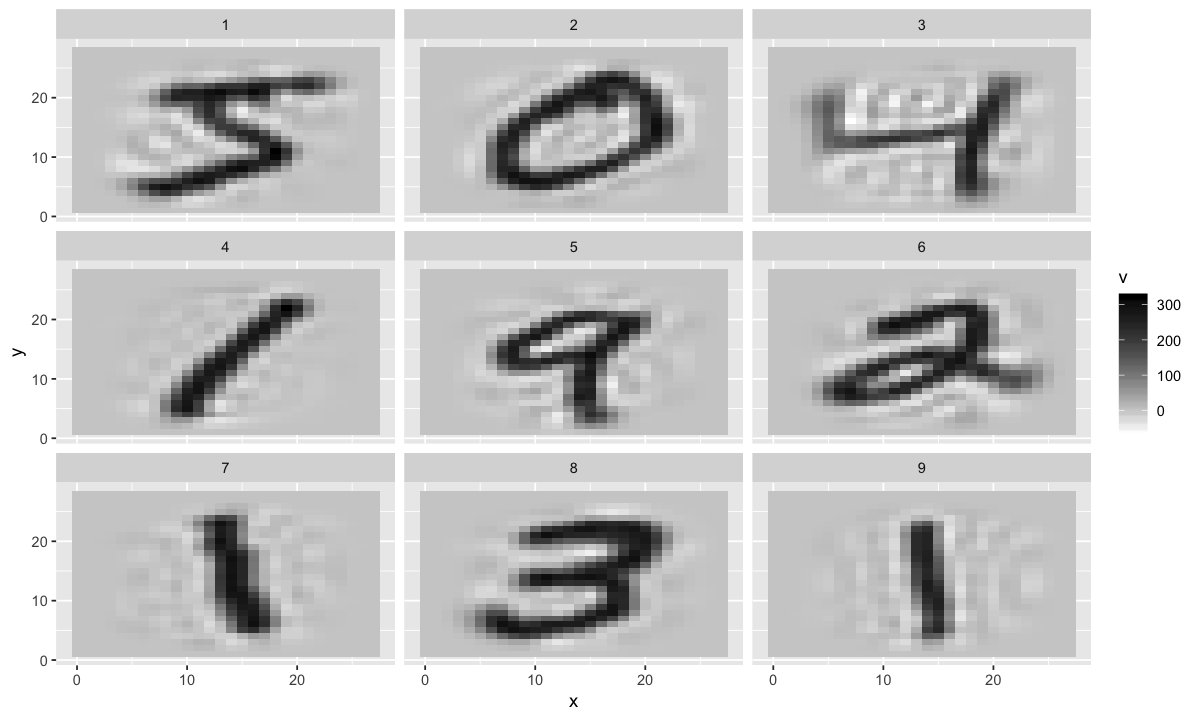

In [148]:
K <- 100  # Number of principal components
P <- pca$rotation[, 1:K]
projected = as_tibble(scale(train[, -1], pca$center, pca$scale) %*% P %*% t(P))
names(projected) <- names(train)[-1]
plot_images(projected[1:9, ])

Now let us see how dimensionality reduction has helped out when trying to fit the logistic regression. Instead of using the complete data set, we will only use the top $k$ principal components:

In [150]:
y <- train$X1 == 5
K <- 25 # Number of principal components
P <- pca$rotation[, 1:K]
X = scale(train[, -1], pca$center, pca$scale) %*% P
df <- as_tibble(X)
colnames(df) <- colnames(X)
df$y <- y
mdl <- glm(y ~ ., df, family="binomial")

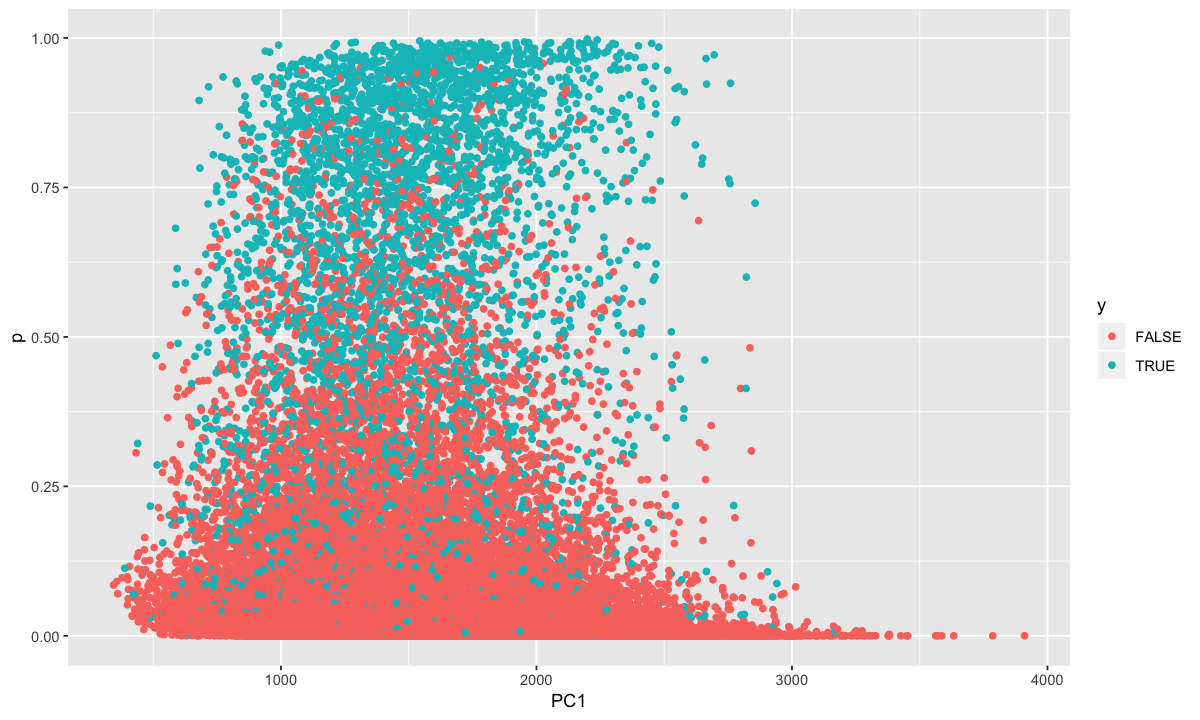

In [153]:
df %>% add_predictions(mdl) %>% mutate(p = plogis(pred)) %>%
    ggplot + geom_point(aes(x=PC1, y=p, colour=y))

## Test error
To test how well our model does, we will calculate its test error. Our measure of the error will be the (negative) log-likelihood of observing each observation under our model, defined as:

$$\text{loss} = -\sum_i y_i \log(\hat{p}_i) + (1 - y_i) \log(1-\hat{p}_i)$$

In [ ]:
Xtest <- scale(test[, -1], pca$center, pca$scale) %*% P
df <- as_tibble(Xtest)
colnames(df) <- colnames(Xtest)
df$y <- test$X1 == 5
test_err <- df %>% add_predictions(mdl) %>% 
    mutate(p = plogis(pred), error = -(y * log(p) + (1 - y) * log1p(-p)))
sum(test_err$error)

### Challenge problem
Minimize the test error!